In [36]:
import os
from SALib.sample import saltelli
from SALib.analyze import sobol
import eval3
import numpy as np
import math
import pandas as pd

In [37]:
problem = {
    'num_vars': 6,
    'names': ['margin', 'alpha', 'beta','beta1','beta2','lrAE'],
    'bounds': [[0.1, 1],
               [1, 10],
               [1, 10],
               [0.1,1],
               [0.1,1],
               [0.0001,0.1]]
}

In [7]:
def evaluate(X):
    tmp=[]
    for x in X:
        os.system('conda run -n conAAE python train_ae.py -i sci-CAR -sd test --discriminator --conditional --triplet-loss --consistency-loss'+ ' --margin '+ str(x[0])+' --alpha '+ str(x[1])+' --beta '+ str(x[2])+' --beta1 '+ str(x[3])+' --beta2 '+ str(x[4])+' -lrAE '+ str(x[5]))
        tmp.append(eval3.go()) 
    return np.array(tmp)

In [29]:
param_values = saltelli.sample(problem, 5)

In [30]:
param_values.shape

(70, 6)

In [12]:
Y = evaluate(param_values)

Pre-trained model loaded from None
0
6.824103116989136
1
4.658713340759277
2
4.55171012878418
3
4.552900314331055
4
4.527442693710327
5
4.574728012084961
6
4.381937265396118
7
4.502941608428955
8
4.900659561157227
9
4.646360158920288
10
5.059866189956665
53.18136239051819

Pre-trained model loaded from None
0
6.296400308609009
1
4.459319114685059
2
4.41492486000061
3
4.320246696472168
4
4.737114906311035
5
4.397897481918335
6
4.416095972061157
7
4.382618427276611
8
4.27864670753479
9
4.426172256469727
10
4.786427736282349
50.91586446762085

Pre-trained model loaded from None
0
6.261895179748535
1
4.310251951217651
2
4.22593355178833
3
4.339123487472534
4
4.276360273361206
5
4.442746877670288
6
4.458543062210083
7
4.326410293579102
8
4.228802680969238
9
4.342676401138306
10
5.007958650588989
50.22070240974426

Pre-trained model loaded from None
0
6.5573999881744385
1
4.438107967376709
2
4.364798307418823
3
4.429597616195679
4
4.421673774719238
5
4.395338296890259
6
4.340869188308716
7
4

In [33]:
pd.DataFrame(Y).to_csv('Y.csv')

In [42]:
Y=pd.read_csv('Y.csv',index_col=0).values

In [43]:
Y[:,0]

array([0.42896936, 0.38997214, 0.45682451, 0.42896936, 0.31754875,
       0.33147632, 0.40668524, 0.49303621, 0.40947075, 0.44011142,
       0.46518106, 0.38718663, 0.35097493, 0.44011142, 0.40389972,
       0.31476323, 0.40389972, 0.40389972, 0.55431755, 0.47910864,
       0.3816156 , 0.42061281, 0.3816156 , 0.47075209, 0.29805014,
       0.41225627, 0.44568245, 0.47075209, 0.47910864, 0.47910864,
       0.4735376 , 0.41225627, 0.47910864, 0.46518106, 0.43175487,
       0.50139276, 0.42339833, 0.42896936, 0.40111421, 0.36490251,
       0.45682451, 0.40111421, 0.48467967, 0.33983287, 0.44846797,
       0.4902507 , 0.48467967, 0.41504178, 0.33426184, 0.55431755,
       0.454039  , 0.49303621, 0.53481894, 0.37604457, 0.32590529,
       0.53481894, 0.40111421, 0.32311978, 0.46239554, 0.38440111,
       0.41225627, 0.40111421, 0.49303621, 0.59052925, 0.51810585,
       0.5097493 , 0.54038997, 0.52089136, 0.42618384, 0.48746518])

In [44]:
#print(Y[:,0])
Si = sobol.analyze(problem, Y[:,0], print_to_console=True)
print(Si)

# Print the first-order sensitivity indices  一阶灵敏度
print('S1:', Si['S1'])

# Print the second-order sensitivity indices   二阶灵敏度
print("x1-x2:", Si['S2'][0, 1])
print("x1-x3:", Si['S2'][0, 2])
print("x2-x3:", Si['S2'][1, 2])

              ST   ST_conf
margin  1.983067  1.145647
alpha   0.318858  0.332082
beta    0.259467  0.548236
beta1   1.908934  3.554098
beta2   1.096837  1.687147
lrAE    1.862601  1.143023
              S1   S1_conf
margin -2.340087  1.566277
alpha  -0.013034  1.094778
beta    0.220378  0.601713
beta1   0.579564  1.165850
beta2  -0.453080  1.404616
lrAE   -1.013364  3.091715
                       S2   S2_conf
(margin, alpha)  3.362682  0.742656
(margin, beta)   1.751124  2.725716
(margin, beta1)  1.319802  3.148916
(margin, beta2)  1.385512  2.511941
(margin, lrAE)   2.842063  1.977569
(alpha, beta)   -0.356346  1.211126
(alpha, beta1)  -1.138115  2.626966
(alpha, beta2)   0.083400  2.066652
(alpha, lrAE)    1.710122  1.959094
(beta, beta1)   -0.368368  0.395337
(beta, beta2)   -0.121538  0.406597
(beta, lrAE)     0.366226  1.002690
(beta1, beta2)  -1.871891  3.086358
(beta1, lrAE)    0.689079  1.061860
(beta2, lrAE)    2.947162  3.178585
{'S1': array([-2.34008677, -0.01303351,  0.220

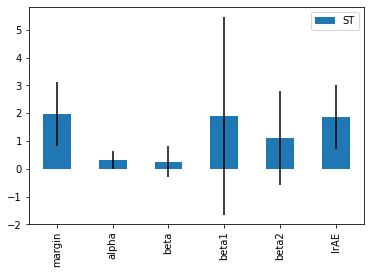

In [45]:
from SALib.plotting.bar import plot as barplot
import matplotlib.pyplot as plot

Si_df = Si.to_df()
barplot(Si_df[0])
plot.show()